## Analysis of total metabolites

In [289]:
import pandas as pd
import os
import rdkit.Chem as Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

import venn
import seaborn as sns
import matplotlib.pyplot as plt

#### Master list of metabolites used for this study

In [ ]:
master_paper = pd.read_csv(r')

#### Predictions Summary

In [267]:
prediction_count = master_paper[['Parent_DTXSID','BioTransformer','Meteor','ToolBox','TIMES','Reported']].groupby(by = 'Parent_DTXSID').sum()
prediction_count

,BioTransformer,Meteor,ToolBox,TIMES,Reported
Parent_DTXSID,,,,,
DTXSID0020151,15,5,4,4,9
DTXSID0020529,9,16,16,0,5
DTXSID0020575,11,16,11,10,8
DTXSID0022777,18,3,11,8,4
DTXSID0044151,9,4,4,0,2
DTXSID1020069,60,12,8,1,7
DTXSID1025726,14,4,5,0,8
DTXSID2026781,2,7,5,3,3
DTXSID3020205,82,21,15,10,11


In [58]:
sum(master_paper[['BioTransformer','Meteor','ToolBox','TIMES']].sum(axis = 1)>0)

1668

In [59]:
master_paper[['BioTransformer','Meteor','ToolBox','TIMES']].sum()

BioTransformer    827
Meteor            714
ToolBox           316
TIMES             132
dtype: int64

In [303]:
master_paper[['Parent_DTXSID','BioTransformer','Meteor','ToolBox','TIMES','Reported']].groupby(by = 'Parent_DTXSID').sum().median()

BioTransformer    14.0
Meteor             7.0
ToolBox            8.0
TIMES              3.0
Reported           6.0
dtype: float64

In [304]:
master_paper[['Parent_DTXSID','BioTransformer','Meteor','ToolBox','TIMES','Reported']].groupby(by = 'Parent_DTXSID').sum().mean()

BioTransformer    22.351351
Meteor            19.297297
ToolBox            8.540541
TIMES              3.567568
Reported           7.243243
dtype: float64

In [274]:
prediction_count.index

Index(['DTXSID0020151', 'DTXSID0020529', 'DTXSID0020575', 'DTXSID0022777',
       'DTXSID0044151', 'DTXSID1020069', 'DTXSID1025726', 'DTXSID2026781',
       'DTXSID3020205', 'DTXSID4020371', 'DTXSID4020373', 'DTXSID4020375',
       'DTXSID4023624', 'DTXSID4025791', 'DTXSID4034150', 'DTXSID5020027',
       'DTXSID5020152', 'DTXSID5020528', 'DTXSID5021889', 'DTXSID5023792',
       'DTXSID5025607', 'DTXSID6020143', 'DTXSID6022345', 'DTXSID6025725',
       'DTXSID7020182', 'DTXSID7020685', 'DTXSID7020762', 'DTXSID8020913',
       'DTXSID8020961', 'DTXSID8021482', 'DTXSID8031077', 'DTXSID9020374',
       'DTXSID9020376', 'DTXSID9020453', 'DTXSID9020827', 'DTXSID9023752',
       'DTXSID9047251'],
      dtype='object', name='Parent_DTXSID')

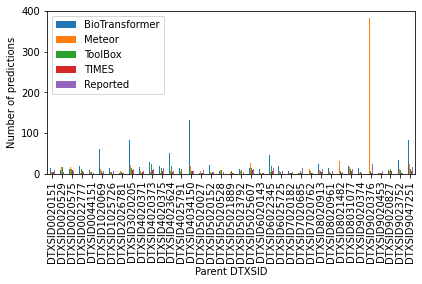

In [300]:
## Bar plot of the number of predictions for each parent
fig = prediction_count.plot.bar(figsize = (6.6, 3)).get_figure()
plt.ylabel('Number of predictions')
plt.xlabel('Parent DTXSID')
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\Prediction_bar.tiff', dpi = 300, bbox_inches = "tight")

In [239]:
bt_venn = set([row['SMILES'] for idx, row in master_paper.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['SMILES'] for idx, row in master_paper.iterrows() if row['Meteor'] > 0])
times_venn = set([row['SMILES'] for idx, row in master_paper.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['SMILES'] for idx, row in master_paper.iterrows() if row['ToolBox'] > 0])
lit_venn = set([row['SMILES'] for idx, row in master_paper.iterrows() if row['Reported'] > 0])

In [240]:
labels = venn.get_labels([bt_venn,meteor_venn,times_venn,tb_venn])##, fill=['number'])

In [241]:
print(labels)

{'0001': '126 ', '0010': '21 ', '0011': '28 ', '0100': '540 ', '0101': '42 ', '0110': '7 ', '0111': '24 ', '1000': '721 ', '1001': '19 ', '1010': '2 ', '1011': '9 ', '1100': '35 ', '1101': '14 ', '1110': '5 ', '1111': '21 '}


C:\Users\MBOYCE\Anaconda3\envs\my-RAX-env\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transpernt" which is no longer supported as of 3.3 and will become an error two minor releases later
  
C:\Users\MBOYCE\Anaconda3\envs\my-RAX-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


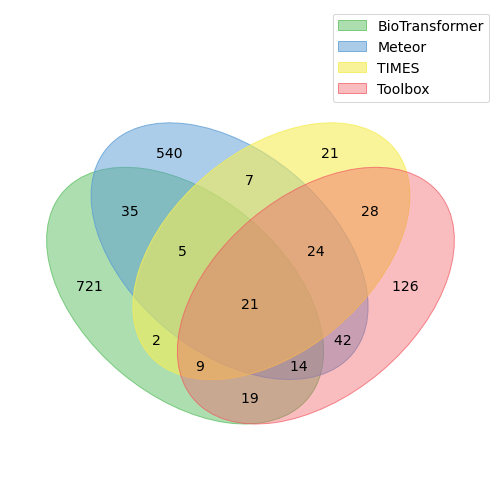

In [302]:
fig, ax = venn.venn4(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox'])
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\predicted_ven.tiff', dpi=300,  bbox_inches = "tight", transpernt = True)
fig.show()


#### Literature Summary

In [95]:
##Sum of num markush parents and non-markush predictions
reported_mark_par = [row['Metabolite_DTXSID'] for idx, row in master_paper.iterrows() if row['Markush'] == True]
reported_nonmark = [row['Metabolite_DTXSID'] for idx, row in master_paper.iterrows() if row['Markush'] == False and row['Reported'] > 0]

##Total predictions:
[len(set(reported_mark_par)), len(reported_nonmark), len(set(reported_mark_par)) + len(reported_nonmark)]

[9, 225, 234]

In [97]:
##Number of markush metabolites
len(reported_mark_par)

43

In [99]:
report_subset = master_paper[master_paper['Reported'] == 1]
report_subset

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported
0,DTXSID0044151,DTXSID6059362,Nc1cc(N)cc(N)c1,C6H9N3,123.079647,False,True,0,1,1,0,1
1,DTXSID0044151,DTXSID7063687,Nc1cc(N)cc([N+](=O)[O-])c1,C6H7N3O2,153.053826,False,True,0,1,1,0,1
6,DTXSID6025725,DTXSID4021137,Nc1cccc(N)c1,C6H8N2,108.068748,False,True,0,1,1,0,1
18,DTXSID8031077,DTXSID30865801,COc1cc(CCC(=O)CC(=O)CCc2ccc(O)c(OC)c2)ccc1O,C21H24O6,372.157288,False,True,0,0,1,0,1
20,DTXSID1025726,DTXSID70209063,NC1=C([N+](=O)[O-])C=CC=C1O,C6H6N2O3,154.037842,False,True,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,DTXSID9020376,DTXSID8024236,BrC1=CC(Br)=C(OC2=C(Br)C(Br)=CC(Br)=C2Br)C(Br)...,C12H2Br8O,793.357261,True,True,0,0,0,0,1
2087,DTXSID9020376,DTXSID8024236,BrC1=CC(Br)=C(Br)C(OC2=C(Br)C(Br)=CC(Br)=C2Br)...,C12H2Br8O,793.357261,True,True,0,0,0,0,1
2088,DTXSID9020376,DTXSID8024236,BrC1=CC(Br)=C(Br)C(OC2=C(Br)C(Br)=C(Br)C(Br)=C...,C12H2Br8O,793.357261,True,True,0,0,0,0,1
2623,DTXSID9023752,DTXSID70858570,CC(C1=CC2=CC=CC=C2S1)N(C(=O)N)OC3C(C(C(C(O3)C(...,C17H20N2O8S,412.094037,False,True,0,0,0,0,1


In [102]:
report_subset.groupby(by = ['Parent_DTXSID', 'SMILES'])

In [227]:
## Get unique parent-metabolite pairs for reported metabolites
par_met_pair = pd.Series(zip(report_subset['Parent_DTXSID'], report_subset['Metabolite_DTXSID']))

## Find which pairs are predicted by the different metabolite prediction software

bt_venn_rp = set(par_met_pair[(report_subset['BioTransformer'] == 1).values])
met_venn_rp = set(par_met_pair[(report_subset['Meteor'] == 1).values])
tb_venn_rp = set(par_met_pair[(report_subset['ToolBox'] == 1).values])
tm_venn_rp = set(par_met_pair[(report_subset['TIMES'] == 1).values])
rep_venn = set(par_met_pair[(report_subset['Reported'] == 1).values])


C:\Users\MBOYCE\Anaconda3\envs\my-RAX-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


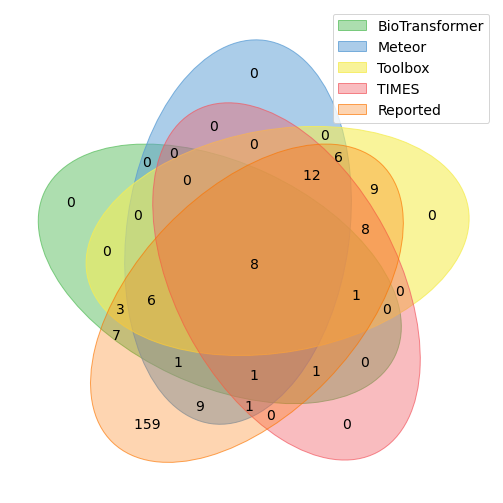

In [237]:
labels = venn.get_labels([bt_venn_rp, met_venn_rp, tb_venn_rp, tm_venn_rp, rep_venn], fill=['number'])
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'Toolbox', 'TIMES', 'Reported'])
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\reported_ven.tiff', dpi=300)
fig.show()